In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [2]:
resultados_df = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
corridas_df = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
pilotos_df = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
construtores_df = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv')

In [3]:
con1 = pd.merge(resultados_df, corridas_df,how = 'left', on ='raceId')


In [4]:
con1 = con1.drop(['url','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time','date','time_y','time_x',
              'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date','sprint_time','round',],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [5]:
con2 = pd.merge(con1, pilotos_df, on = 'driverId')

In [6]:
con2 = con2.drop(['fastestLap','fastestLapTime','fastestLapSpeed','code'],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
con2.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'milliseconds', 'rank', 'statusId', 'year', 'circuitId', 'name',
       'driverRef', 'number_y', 'forename', 'surname', 'dob', 'nationality',
       'url'],
      dtype='object')

In [8]:
con2 = con2.drop(['dob','nationality','url','number_y'],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
con2 = con2.drop(['milliseconds','driverRef','laps','resultId','number_x','positionText', 'positionOrder','raceId','driverId', 'grid', 'position',
                 'rank', 'statusId','circuitId'],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
con2['driver_name'] = con2['forename']+' '+con2['surname']
con2 = con2.drop(['forename','surname'],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [11]:
con2.head()

,constructorId,points,year,name,driver_name
0,1,10.0,2008,Australian Grand Prix,Lewis Hamilton
1,1,4.0,2008,Malaysian Grand Prix,Lewis Hamilton
2,1,0.0,2008,Bahrain Grand Prix,Lewis Hamilton
3,1,6.0,2008,Spanish Grand Prix,Lewis Hamilton
4,1,8.0,2008,Turkish Grand Prix,Lewis Hamilton


In [12]:
con2008 = con2[con2['year']==2008]
con2008.head()

,constructorId,points,year,name,driver_name
0,1,10.0,2008,Australian Grand Prix,Lewis Hamilton
1,1,4.0,2008,Malaysian Grand Prix,Lewis Hamilton
2,1,0.0,2008,Bahrain Grand Prix,Lewis Hamilton
3,1,6.0,2008,Spanish Grand Prix,Lewis Hamilton
4,1,8.0,2008,Turkish Grand Prix,Lewis Hamilton


In [13]:
pointsdriver = con2008.groupby('driver_name')['points'].sum()
print(pointsdriver)

driver_name
Adrian Sutil             0.0
Anthony Davidson         0.0
David Coulthard          8.0
Felipe Massa            97.0
Fernando Alonso         61.0
Giancarlo Fisichella     0.0
Heikki Kovalainen       53.0
Jarno Trulli            31.0
Jenson Button            3.0
Kazuki Nakajima          9.0
Kimi Räikkönen          75.0
Lewis Hamilton          98.0
Mark Webber             21.0
Nelson Piquet Jr.       19.0
Nick Heidfeld           60.0
Nico Rosberg            17.0
Robert Kubica           75.0
Rubens Barrichello      11.0
Sebastian Vettel        35.0
Sébastien Bourdais       4.0
Takuma Sato              0.0
Timo Glock              25.0
Name: points, dtype: float64


In [14]:
con2008 = pd.merge(con2008, pointsdriver,how = 'left', on ='driver_name')
con2008.head()

,constructorId,points_x,year,name,driver_name,points_y
0,1,10.0,2008,Australian Grand Prix,Lewis Hamilton,98.0
1,1,4.0,2008,Malaysian Grand Prix,Lewis Hamilton,98.0
2,1,0.0,2008,Bahrain Grand Prix,Lewis Hamilton,98.0
3,1,6.0,2008,Spanish Grand Prix,Lewis Hamilton,98.0
4,1,8.0,2008,Turkish Grand Prix,Lewis Hamilton,98.0


In [15]:
con2008['classificacao']=con2008['points_y'].rank(ascending=False,method='dense')
con2008.head()

,constructorId,points_x,year,name,driver_name,points_y,classificacao
0,1,10.0,2008,Australian Grand Prix,Lewis Hamilton,98.0,1.0
1,1,4.0,2008,Malaysian Grand Prix,Lewis Hamilton,98.0,1.0
2,1,0.0,2008,Bahrain Grand Prix,Lewis Hamilton,98.0,1.0
3,1,6.0,2008,Spanish Grand Prix,Lewis Hamilton,98.0,1.0
4,1,8.0,2008,Turkish Grand Prix,Lewis Hamilton,98.0,1.0


In [16]:
con2000 = con2[con2['year']==2000]
pointsdriver = con2000.groupby('driver_name')['points'].sum()
con2000 = pd.merge(con2000, pointsdriver,how = 'left', on ='driver_name')
con2000['classificacao']=con2000['points_y'].rank(ascending=False,method='dense')

con2001 = con2[con2['year']==2001]
pointsdriver = con2001.groupby('driver_name')['points'].sum()
con2001 = pd.merge(con2001, pointsdriver,how = 'left', on ='driver_name')
con2001['classificacao']=con2001['points_y'].rank(ascending=False,method='dense')

con2002 = con2[con2['year']==2002]
pointsdriver = con2002.groupby('driver_name')['points'].sum()
con2002 = pd.merge(con2002, pointsdriver,how = 'left', on ='driver_name')
con2002['classificacao']=con2002['points_y'].rank(ascending=False,method='dense')

con2003 = con2[con2['year']==2003]
pointsdriver = con2003.groupby('driver_name')['points'].sum()
con2003 = pd.merge(con2003, pointsdriver,how = 'left', on ='driver_name')
con2003['classificacao']=con2003['points_y'].rank(ascending=False,method='dense')

con2004 = con2[con2['year']==2004]
pointsdriver = con2004.groupby('driver_name')['points'].sum()
con2004 = pd.merge(con2004, pointsdriver,how = 'left', on ='driver_name')
con2004['classificacao']=con2004['points_y'].rank(ascending=False,method='dense')

con2005 = con2[con2['year']==2005]
pointsdriver = con2005.groupby('driver_name')['points'].sum()
con2005 = pd.merge(con2005, pointsdriver,how = 'left', on ='driver_name')
con2005['classificacao']=con2005['points_y'].rank(ascending=False,method='dense')

con2006 = con2[con2['year']==2006]
pointsdriver = con2006.groupby('driver_name')['points'].sum()
con2006 = pd.merge(con2006, pointsdriver,how = 'left', on ='driver_name')
con2006['classificacao']=con2006['points_y'].rank(ascending=False,method='dense')

con2007 = con2[con2['year']==2007]
pointsdriver = con2007.groupby('driver_name')['points'].sum()
con2007 = pd.merge(con2007, pointsdriver,how = 'left', on ='driver_name')
con2007['classificacao']=con2007['points_y'].rank(ascending=False,method='dense')

con2009 = con2[con2['year']==2009]
pointsdriver = con2009.groupby('driver_name')['points'].sum()
con2009 = pd.merge(con2009, pointsdriver,how = 'left', on ='driver_name')
con2009['classificacao']=con2009['points_y'].rank(ascending=False,method='dense')

con2010 = con2[con2['year']==2010]
pointsdriver = con2010.groupby('driver_name')['points'].sum()
con2010 = pd.merge(con2010, pointsdriver,how = 'left', on ='driver_name')
con2010['classificacao']=con2010['points_y'].rank(ascending=False,method='dense')

con2011 = con2[con2['year']==2011]
pointsdriver = con2011.groupby('driver_name')['points'].sum()
con2011 = pd.merge(con2011, pointsdriver,how = 'left', on ='driver_name')
con2011['classificacao']=con2011['points_y'].rank(ascending=False,method='dense')

con2012 = con2[con2['year']==2012]
pointsdriver = con2012.groupby('driver_name')['points'].sum()
con2012 = pd.merge(con2012, pointsdriver,how = 'left', on ='driver_name')
con2012['classificacao']=con2012['points_y'].rank(ascending=False,method='dense')

con2013 = con2[con2['year']==2013]
pointsdriver = con2013.groupby('driver_name')['points'].sum()
con2013 = pd.merge(con2013, pointsdriver,how = 'left', on ='driver_name')
con2013['classificacao']=con2013['points_y'].rank(ascending=False,method='dense')

con2014 = con2[con2['year']==2014]
pointsdriver = con2014.groupby('driver_name')['points'].sum()
con2014 = pd.merge(con2014, pointsdriver,how = 'left', on ='driver_name')
con2014['classificacao']=con2014['points_y'].rank(ascending=False,method='dense')

con2015 = con2[con2['year']==2015]
pointsdriver = con2015.groupby('driver_name')['points'].sum()
con2015 = pd.merge(con2015, pointsdriver,how = 'left', on ='driver_name')
con2015['classificacao']=con2015['points_y'].rank(ascending=False,method='dense')

con2016 = con2[con2['year']==2016]
pointsdriver = con2016.groupby('driver_name')['points'].sum()
con2016 = pd.merge(con2016, pointsdriver,how = 'left', on ='driver_name')
con2016['classificacao']=con2016['points_y'].rank(ascending=False,method='dense')

con2017 = con2[con2['year']==2017]
pointsdriver = con2017.groupby('driver_name')['points'].sum()
con2017 = pd.merge(con2017, pointsdriver,how = 'left', on ='driver_name')
con2017['classificacao']=con2017['points_y'].rank(ascending=False,method='dense')

con2018 = con2[con2['year']==2018]
pointsdriver = con2018.groupby('driver_name')['points'].sum()
con2018 = pd.merge(con2018, pointsdriver,how = 'left', on ='driver_name')
con2018['classificacao']=con2018['points_y'].rank(ascending=False,method='dense')

con2019 = con2[con2['year']==2019]
pointsdriver = con2019.groupby('driver_name')['points'].sum()
con2019 = pd.merge(con2019, pointsdriver,how = 'left', on ='driver_name')
con2019['classificacao']=con2019['points_y'].rank(ascending=False,method='dense')

con2020 = con2[con2['year']==2020]
pointsdriver = con2020.groupby('driver_name')['points'].sum()
con2020 = pd.merge(con2020, pointsdriver,how = 'left', on ='driver_name')
con2020['classificacao']=con2020['points_y'].rank(ascending=False,method='dense')

con2021 = con2[con2['year']==2021]
pointsdriver = con2021.groupby('driver_name')['points'].sum()
con2021 = pd.merge(con2021, pointsdriver,how = 'left', on ='driver_name')
con2021['classificacao']=con2021['points_y'].rank(ascending=False,method='dense')

con2022 = con2[con2['year']==2022]
pointsdriver = con2022.groupby('driver_name')['points'].sum()
con2022 = pd.merge(con2022, pointsdriver,how = 'left', on ='driver_name')
con2022['classificacao']=con2022['points_y'].rank(ascending=False,method='dense')

In [17]:
mika = con2000.loc[con2000['driver_name']=='Mika Häkkinen']
mika.head(5)

,constructorId,points_x,year,name,driver_name,points_y,classificacao
305,1,0.0,2000,Australian Grand Prix,Mika Häkkinen,89.0,2.0
306,1,0.0,2000,Brazilian Grand Prix,Mika Häkkinen,89.0,2.0
307,1,6.0,2000,San Marino Grand Prix,Mika Häkkinen,89.0,2.0
308,1,6.0,2000,British Grand Prix,Mika Häkkinen,89.0,2.0
309,1,10.0,2000,Spanish Grand Prix,Mika Häkkinen,89.0,2.0


In [18]:
fernando = con2005.loc[con2005['driver_name']=='Fernando Alonso']
fernando.head()

,constructorId,points_x,year,name,driver_name,points_y,classificacao
14,4,6.0,2005,Australian Grand Prix,Fernando Alonso,133.0,1.0
15,4,10.0,2005,Malaysian Grand Prix,Fernando Alonso,133.0,1.0
16,4,10.0,2005,Bahrain Grand Prix,Fernando Alonso,133.0,1.0
17,4,10.0,2005,San Marino Grand Prix,Fernando Alonso,133.0,1.0
18,4,8.0,2005,Spanish Grand Prix,Fernando Alonso,133.0,1.0


In [19]:
contotal = pd.concat([con2000,con2001,con2002,con2003,con2004,con2005,con2005,con2006,con2007,con2008,con2009,con2010,con2011,con2012,con2013,con2014,con2015,con2016,con2017,con2018,
                           con2019,con2020,con2021,con2022])
contotal.head()

,constructorId,points_x,year,name,driver_name,points_y,classificacao
0,20,0.0,2000,Australian Grand Prix,Nick Heidfeld,0.0,15.0
1,20,0.0,2000,Brazilian Grand Prix,Nick Heidfeld,0.0,15.0
2,20,0.0,2000,San Marino Grand Prix,Nick Heidfeld,0.0,15.0
3,20,0.0,2000,British Grand Prix,Nick Heidfeld,0.0,15.0
4,20,0.0,2000,Spanish Grand Prix,Nick Heidfeld,0.0,15.0


In [20]:
df = pd.merge(contotal,construtores_df,how = 'left', on ='constructorId')
df.head(20)

,constructorId,points_x,year,name_x,driver_name,points_y,classificacao,constructorRef,name_y,nationality,url
0,20,0.0,2000,Australian Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
1,20,0.0,2000,Brazilian Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
2,20,0.0,2000,San Marino Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
3,20,0.0,2000,British Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
4,20,0.0,2000,Spanish Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
5,20,0.0,2000,Monaco Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
6,20,0.0,2000,Canadian Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
7,20,0.0,2000,French Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
8,20,0.0,2000,Austrian Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix
9,20,0.0,2000,German Grand Prix,Nick Heidfeld,0.0,15.0,prost,Prost,French,http://en.wikipedia.org/wiki/Prost_Grand_Prix


In [21]:
df = df.drop(['constructorId','points_x','name_x','points_y','constructorRef','nationality','url'],1)
df = df.rename(columns={'name_y':'constructor_name','classificacao':'classification'})
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,year,driver_name,classification,constructor_name
0,2000,Nick Heidfeld,15.0,Prost
1,2000,Nick Heidfeld,15.0,Prost
2,2000,Nick Heidfeld,15.0,Prost
3,2000,Nick Heidfeld,15.0,Prost
4,2000,Nick Heidfeld,15.0,Prost


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 9535
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              9536 non-null   int64  
 1   driver_name       9536 non-null   object 
 2   classification    9536 non-null   float64
 3   constructor_name  9536 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 372.5+ KB


In [23]:
df.describe()

,year,classification
count,9536.000000,9536.000000
mean,2011.099622,10.440122
std,6.541524,5.585957
min,2000.000000,1.000000
25%,2005.000000,6.000000
50%,2011.000000,11.000000
75%,2017.000000,15.000000
max,2022.000000,22.000000


In [24]:
df.isnull().sum() / len(df) * 100

year                0.0
driver_name         0.0
classification      0.0
constructor_name    0.0
dtype: float64

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
import warnings 
import pickle
warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)


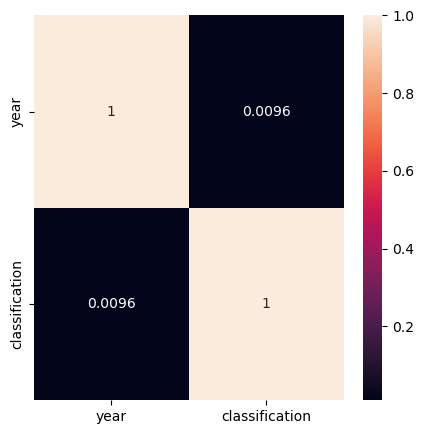

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
# separando colunas categóricas e numéricas para compreensão
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [28]:
df[cat].head()

,driver_name,constructor_name
0,Nick Heidfeld,Prost
1,Nick Heidfeld,Prost
2,Nick Heidfeld,Prost
3,Nick Heidfeld,Prost
4,Nick Heidfeld,Prost


In [29]:
df[num].head()

,year,classification
0,2000,15.0
1,2000,15.0
2,2000,15.0
3,2000,15.0
4,2000,15.0


In [30]:
df.head(30)

,year,driver_name,classification,constructor_name
0,2000,Nick Heidfeld,15.0,Prost
1,2000,Nick Heidfeld,15.0,Prost
2,2000,Nick Heidfeld,15.0,Prost
3,2000,Nick Heidfeld,15.0,Prost
4,2000,Nick Heidfeld,15.0,Prost
5,2000,Nick Heidfeld,15.0,Prost
6,2000,Nick Heidfeld,15.0,Prost
7,2000,Nick Heidfeld,15.0,Prost
8,2000,Nick Heidfeld,15.0,Prost
9,2000,Nick Heidfeld,15.0,Prost


In [31]:
df.tail(30)

,year,driver_name,classification,constructor_name
9506,2022,Mick Schumacher,15.0,Haas F1 Team
9507,2022,Mick Schumacher,15.0,Haas F1 Team
9508,2022,Mick Schumacher,15.0,Haas F1 Team
9509,2022,Mick Schumacher,15.0,Haas F1 Team
9510,2022,Mick Schumacher,15.0,Haas F1 Team
9511,2022,Mick Schumacher,15.0,Haas F1 Team
9512,2022,Mick Schumacher,15.0,Haas F1 Team
9513,2022,Guanyu Zhou,16.0,Alfa Romeo
9514,2022,Guanyu Zhou,16.0,Alfa Romeo
9515,2022,Guanyu Zhou,16.0,Alfa Romeo


In [32]:
df = df.drop_duplicates()
df.head(10)

,year,driver_name,classification,constructor_name
0,2000,Nick Heidfeld,15.0,Prost
16,2000,David Coulthard,3.0,McLaren
33,2000,Jarno Trulli,10.0,Jordan
50,2000,Jenson Button,8.0,Williams
67,2000,Giancarlo Fisichella,6.0,Benetton
84,2000,Rubens Barrichello,4.0,Ferrari
101,2000,Ralf Schumacher,5.0,Williams
118,2000,Alexander Wurz,14.0,Benetton
135,2000,Michael Schumacher,1.0,Ferrari
152,2000,Jacques Villeneuve,7.0,BAR


In [33]:
df.tail(10)

,year,driver_name,classification,constructor_name
9338,2022,Pierre Gasly,12.0,AlphaTauri
9360,2022,Charles Leclerc,2.0,Ferrari
9382,2022,Lando Norris,6.0,McLaren
9404,2022,Alexander Albon,17.0,Williams
9425,2022,George Russell,3.0,Mercedes
9447,2022,Nicholas Latifi,18.0,Williams
9469,2022,Yuki Tsunoda,15.0,AlphaTauri
9491,2022,Mick Schumacher,15.0,Haas F1 Team
9513,2022,Guanyu Zhou,16.0,Alfa Romeo
9535,2022,Nyck de Vries,18.0,Williams


In [34]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [35]:
# codificação de colunas categóricas
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head(30)


## estã salva a transformação do label encoder
#pickle.dump(le, open('/kaggle/working/le.pkl', 'wb'))


,year,driver_name,classification,constructor_name
0,2000,76,15.0,25
16,2000,20,3.0,22
33,2000,41,10.0,16
50,2000,44,8.0,36
67,2000,31,6.0,7
84,2000,99,4.0,10
101,2000,91,5.0,36
118,2000,4,14.0,7
135,2000,69,1.0,10
152,2000,39,7.0,5


In [36]:
df.tail(30)

,year,driver_name,classification,constructor_name
8920,2021,89,9.0,1
8942,2021,13,7.0,10
8964,2021,58,6.0,22
8986,2021,30,15.0,36
9008,2021,75,17.0,36
9030,2021,118,14.0,1
9052,2021,70,19.0,13
9074,2021,80,19.0,13
9096,2022,59,4.0,23
9118,2022,27,8.0,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 9535
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              568 non-null    int64  
 1   driver_name       568 non-null    int64  
 2   classification    568 non-null    float64
 3   constructor_name  568 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.2 KB


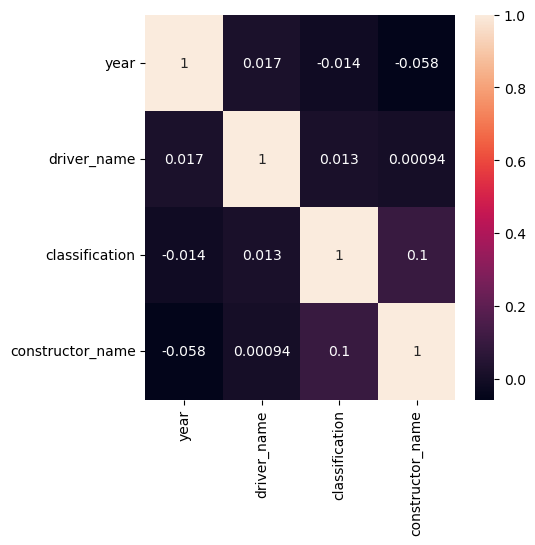

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
x = df.drop('classification',1)
y = df.classification

In [40]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [42]:
clf = DecisionTreeClassifier (max_depth=5,random_state=1234)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [43]:
tree.export_text(clf)

'|--- feature_0 <= 2001.50\n|   |--- feature_2 <= 23.00\n|   |   |--- feature_2 <= 19.00\n|   |   |   |--- feature_1 <= 41.50\n|   |   |   |   |--- feature_1 <= 38.00\n|   |   |   |   |   |--- class: 9.0\n|   |   |   |   |--- feature_1 >  38.00\n|   |   |   |   |   |--- class: 7.0\n|   |   |   |--- feature_1 >  41.50\n|   |   |   |   |--- feature_2 <= 12.50\n|   |   |   |   |   |--- class: 1.0\n|   |   |   |   |--- feature_2 >  12.50\n|   |   |   |   |   |--- class: 15.0\n|   |   |--- feature_2 >  19.00\n|   |   |   |--- feature_1 <= 45.50\n|   |   |   |   |--- feature_0 <= 2000.50\n|   |   |   |   |   |--- class: 3.0\n|   |   |   |   |--- feature_0 >  2000.50\n|   |   |   |   |   |--- class: 2.0\n|   |   |   |--- feature_1 >  45.50\n|   |   |   |   |--- feature_0 <= 2000.50\n|   |   |   |   |   |--- class: 2.0\n|   |   |   |   |--- feature_0 >  2000.50\n|   |   |   |   |   |--- class: 5.0\n|   |--- feature_2 >  23.00\n|   |   |--- feature_2 <= 27.00\n|   |   |   |--- class: 15.0\n|   

In [44]:
fn = list(df.columns)
fn.remove("classification")

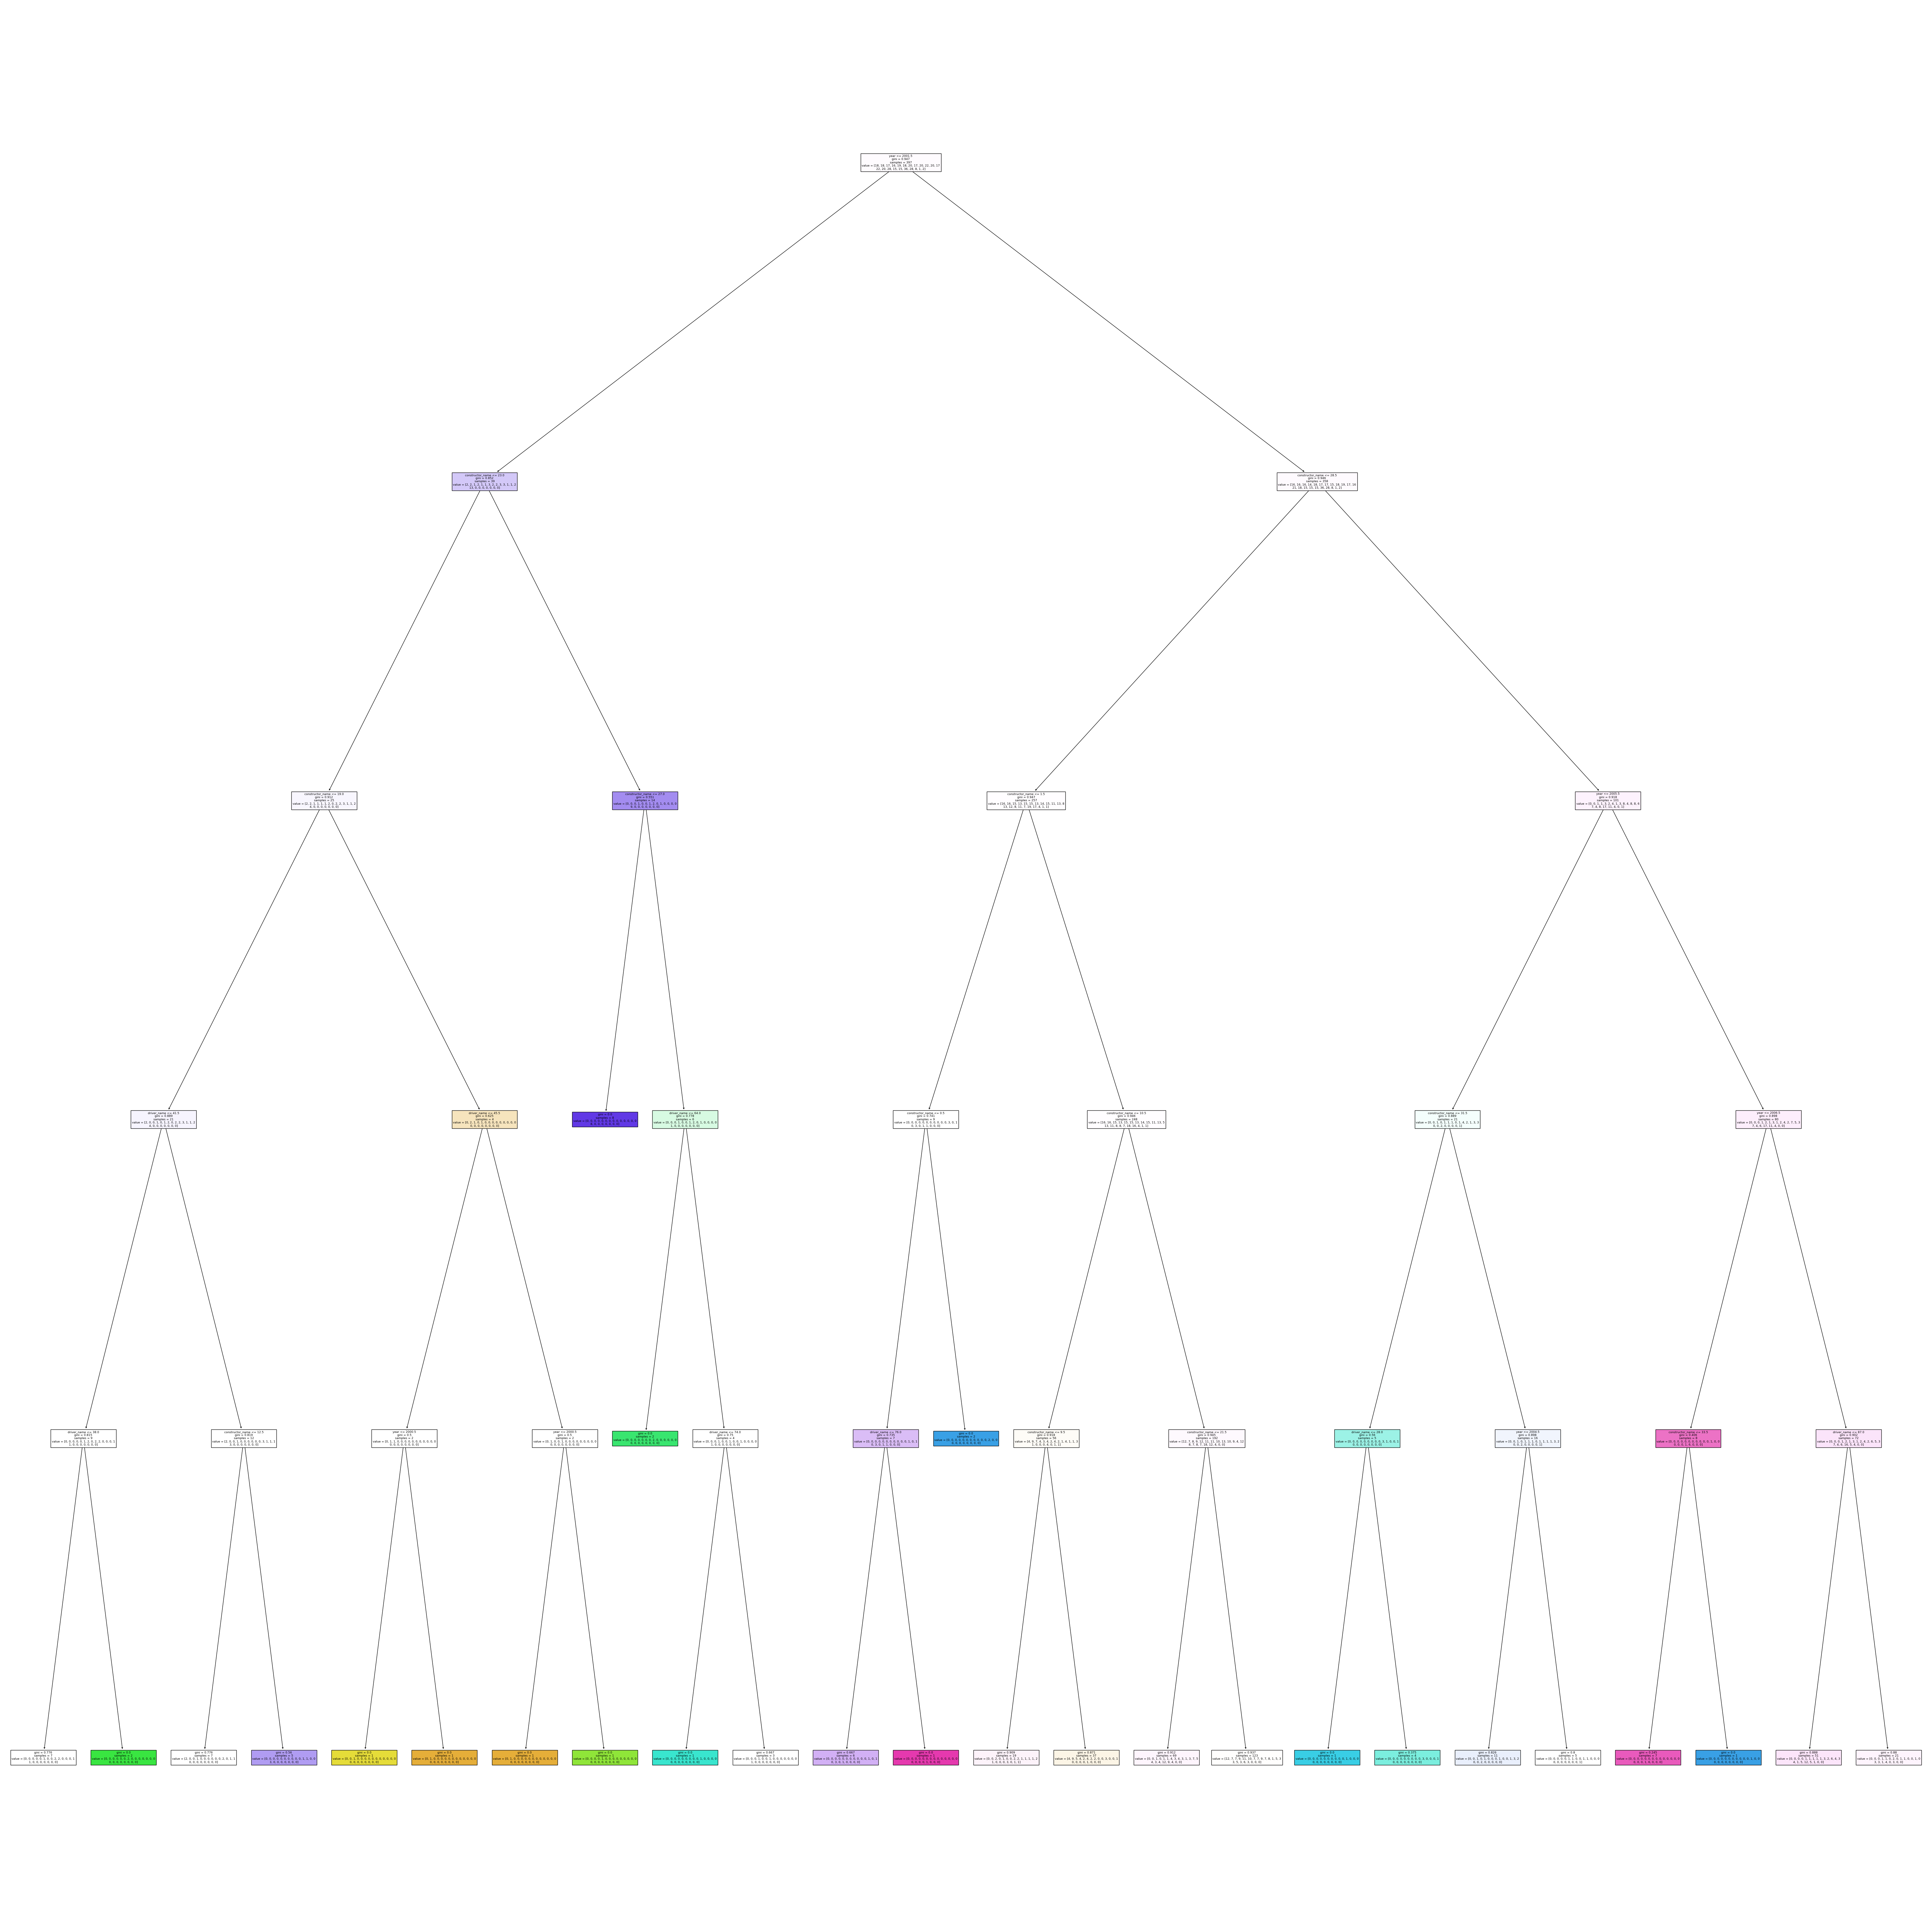

In [45]:
fig = plt.figure(figsize=(80,80))
_ = tree.plot_tree(clf,feature_names = fn, filled=True)

In [46]:
lr = LogisticRegression (solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()


In [47]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypredTrain = i.predict(xtrain)
    print(i," train :",accuracy_score(ypredTrain,ytrain)*100)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})
    nome = str(i) 
    print(nome)
    #pickle.dump(i, open('/kaggle/working/rn.pkl', 'wb'))
     #pickle.dump(le, open('/kaggle/working/le.pkl', 'wb'))

LogisticRegression(solver='sag')  train : 8.816120906801007
LogisticRegression(solver='sag') : 8.771929824561402
LogisticRegression(solver='sag')
SGDClassifier()  train : 5.037783375314862
SGDClassifier() : 3.508771929824561
SGDClassifier()
KNeighborsClassifier()  train : 31.98992443324937
KNeighborsClassifier() : 9.35672514619883
KNeighborsClassifier()
GaussianNB()  train : 14.86146095717884
GaussianNB() : 8.771929824561402
GaussianNB()
RandomForestClassifier()  train : 100.0
RandomForestClassifier() : 17.543859649122805
RandomForestClassifier()
DecisionTreeClassifier()  train : 100.0
DecisionTreeClassifier() : 18.128654970760234
DecisionTreeClassifier()


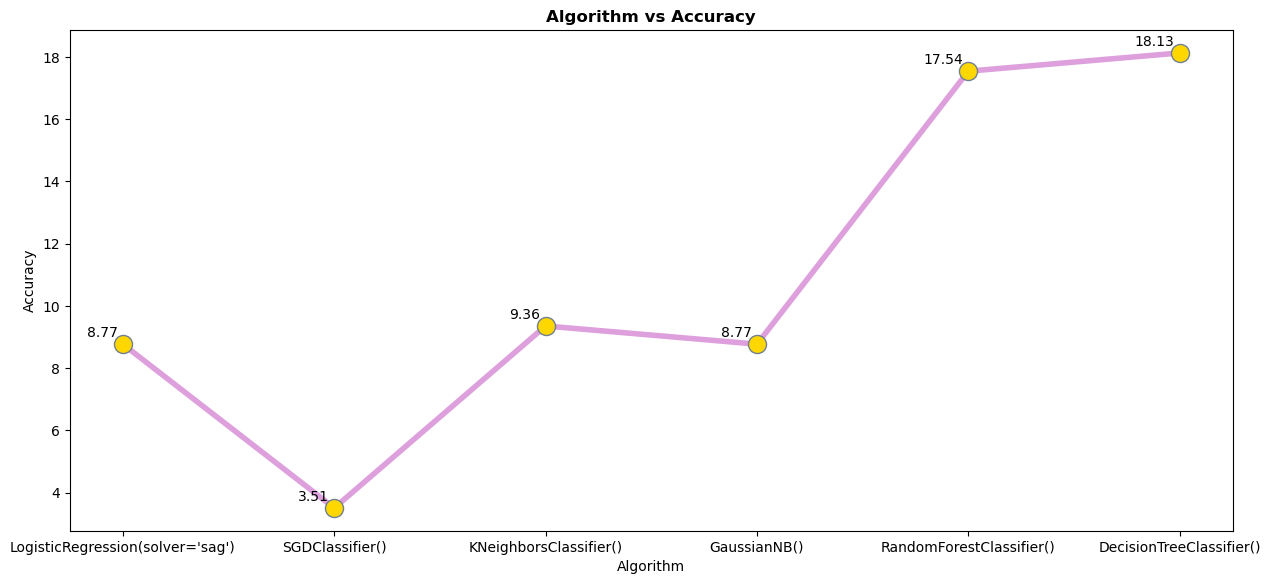

In [48]:
plt.figure(figsize=(15,6.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
for x,y in zip(d.keys(),d.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Acurácia: ", accuracy_score(ytest, ypred))
print("Precisão: ", precision_score(ytest, ypred, average='macro'))
print("Recall: ", recall_score(ytest, ypred, average='macro'))
print("F1-score: ", f1_score(ytest, ypred, average='macro'))

Acurácia:  0.18128654970760233
Precisão:  0.1521485093853515
Recall:  0.17098091302636756
F1-score:  0.15755184238451447


In [50]:
# Exportando o modelo final para implantação
#import pickle

pickle.dump(rn, open('/kaggle/working/models4.pkl', 'wb'))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_train_pred = lr.predict(xtrain)
y_test_pred = lr.predict(xtest)
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)
# Imprimir a precisão nos dados de treinamento e teste
print("Precisão nos dados de treinamento: {:.2f}".format(train_accuracy))
print("Precisão nos dados de teste: {:.2f}".format(test_accuracy))



Precisão nos dados de treinamento: 0.09
Precisão nos dados de teste: 0.09


In [52]:
from sklearn import metrics as m
mae_train = m.mean_absolute_error(ytrain,y_train_pred)
mape_train =np.mean(np.abs((ytrain - y_train_pred)/ ytrain))
mae_test =  m.mean_absolute_error(ytest,y_test_pred)
mape_test =np.mean(np.abs((ytest - y_test_pred)/ ytest))

In [53]:
mape_train

2.0708130611363837

In [54]:
mape_test

1.656197052841043

In [55]:
df.max()

year                2022.0
driver_name          119.0
classification        22.0
constructor_name      36.0
dtype: float64